#  Dimensionality reduction and Visualization     

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df1=pd.read_csv('Normal_Bearing.csv')
df2=pd.read_csv('outer_race_fault_test_2.csv')
df3=pd.read_csv('outer_race_fault_test_3.csv')
df4=pd.read_csv('inner_race_fault.csv')
df5=pd.read_csv('roller_element_fault.csv')

df = pd.concat([df1,df2,df3,df4,df5])
df = df.reset_index(drop=True)
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.398,-0.625,-0.117085,0.093069,0.149567,-0.012753,0.931376,2.661008,-1.277421,Normal
1,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
2,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
3,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
4,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
...,...,...,...,...,...,...,...,...,...,...
2273,0.701,-0.764,-0.114628,0.131560,0.174490,0.134774,1.459441,4.017426,-1.522231,Roller Element
2274,0.571,-0.667,-0.114702,0.126378,0.170667,0.071571,1.195710,3.345699,-1.487915,Roller Element
2275,0.623,-0.708,-0.114239,0.126722,0.170611,0.100394,1.255684,3.651572,-1.493457,Roller Element
2276,0.752,-0.686,-0.114455,0.128396,0.172002,0.086076,1.189483,4.372047,-1.502786,Roller Element


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# PCA with TWO Principal Components

In [4]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

principalDf['Fault']=np.array(df['Fault'])

In [5]:
principalDf

,principal component 1,principal component 2,Fault
0,0.579635,0.169355,Normal
1,0.497286,0.161143,Normal
2,0.512591,-0.003158,Normal
3,0.532749,0.334986,Normal
4,0.355692,0.043308,Normal
...,...,...,...
2273,-0.334664,0.321128,Roller Element
2274,-0.022995,0.465198,Roller Element
2275,-0.123749,0.366848,Roller Element
2276,-0.349936,0.247044,Roller Element


In [6]:
principalDf['Fault'].unique()

array(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'],
      dtype=object)

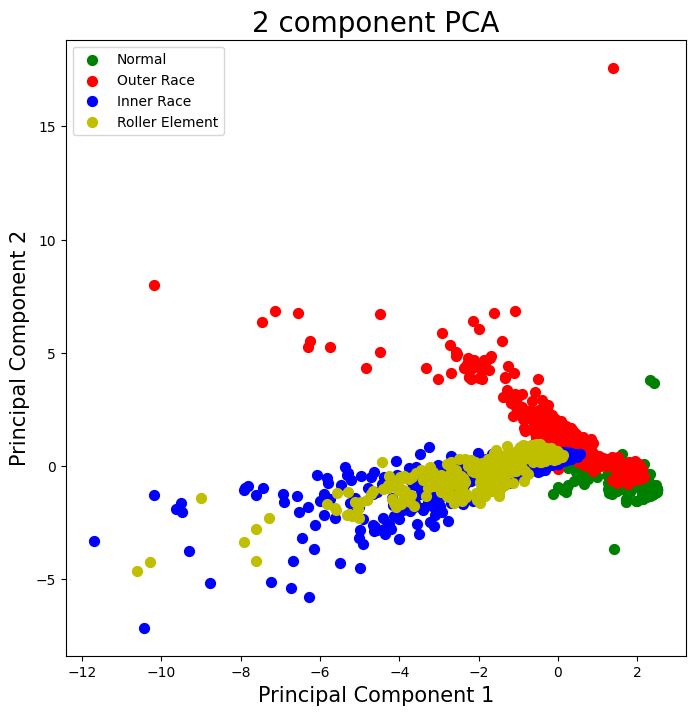

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])


In [8]:
sum(pca_2.explained_variance_ratio_)
pca_2.explained_variance_ratio_

array([0.47682508, 0.18028137])

# PCA with THREE Principal Components

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:

X = StandardScaler().fit_transform(X)

pca_3 = PCA(n_components=3)

X_pca = pca_3.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf['Fault']=np.array(df['Fault'])

In [11]:
principalDf

,principal component 1,principal component 2,principal component 3,Fault
0,0.579635,0.169355,1.566971,Normal
1,0.497286,0.161143,1.545753,Normal
2,0.512591,-0.003158,1.437180,Normal
3,0.532749,0.334986,1.659122,Normal
4,0.355692,0.043308,1.421535,Normal
...,...,...,...,...
2273,-0.334664,0.321128,1.191084,Roller Element
2274,-0.022995,0.465198,1.374193,Roller Element
2275,-0.123749,0.366848,1.285651,Roller Element
2276,-0.349936,0.247044,1.115621,Roller Element


In [12]:
%pip install PyQt5
%matplotlib qt

fig = plt.figure(figsize=(10,14))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter3D(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [13]:
np.sum(pca_3.explained_variance_ratio_)
#pca.explained_variance_ratio_

np.float64(0.8029781707108328)

In [14]:
# PCA with FOUR Principal Components
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_4 = PCA(n_components=4)
X_pca = pca_4.fit_transform(X)

principalDf = pd.DataFrame(
    data = X_pca, 
    columns = ['principal component 1', 'principal component 2',
               'principal component 3', 'principal component 4']
)

principalDf['Fault'] = np.array(df['Fault'])

In [15]:
# Show explained variance for 4 components
print(f"Total explained variance: {np.sum(pca_4.explained_variance_ratio_):.4f}")
print("Individual component explained variance:")
for i, var in enumerate(pca_4.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

# Create pairwise scatter plots between the components
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pair plot to visualize relationships between components
plt.figure(figsize=(12, 10))
fault_types = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
fault_colors = {'Normal': 'g', 'Outer Race': 'r', 'Inner Race': 'b', 'Roller Element': 'y'}

# Create pairplot with Seaborn
sns.pairplot(principalDf, hue='Fault', palette=fault_colors, 
             vars=principalDf.columns[:4], height=2.5)
plt.suptitle('Pairwise Relationships Between Principal Components', y=1.02, fontsize=16)
plt.show()

Total explained variance: 0.9338
Individual component explained variance:
PC1: 0.4768
PC2: 0.1803
PC3: 0.1459
PC4: 0.1309


In [16]:
# PCA with FIVE Principal Components
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_5 = PCA(n_components=5)
X_pca = pca_5.fit_transform(X)

principalDf = pd.DataFrame(
    data = X_pca, 
    columns = ['principal component 1', 'principal component 2',
               'principal component 3', 'principal component 4',
               'principal component 5']
)

principalDf['Fault'] = np.array(df['Fault'])

# Show explained variance for 5 components
print(f"Total explained variance: {np.sum(pca_5.explained_variance_ratio_):.4f}")
print("Individual component explained variance:")
for i, var in enumerate(pca_5.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
cumulative_variance = np.cumsum(pca_5.explained_variance_ratio_)
plt.bar(range(1, 6), pca_5.explained_variance_ratio_, alpha=0.6, color='b', label='Individual explained variance')
plt.step(range(1, 6), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, 6))
plt.legend(loc='best')
plt.tight_layout()
plt.title('Explained Variance by Principal Components')
plt.show()

# Visualize with pairplot for first 3 components (can't easily view all 5D)
import seaborn as sns
fault_colors = {'Normal': 'g', 'Outer Race': 'r', 'Inner Race': 'b', 'Roller Element': 'y'}
sns.pairplot(principalDf, 
             vars=principalDf.columns[:3],  # Just show first 3 for clarity
             hue='Fault', 
             palette=fault_colors,
             height=2.5)
plt.suptitle('First 3 of 5 Principal Components', y=1.02, fontsize=16)
plt.show()

sns.pairplot(principalDf, 
             vars=principalDf.columns[:5],  # Use all 5 components
             hue='Fault', 
             palette=fault_colors,
             height=2.0)  # Smaller subplot size to fit all
plt.suptitle('All 5 Principal Components', y=1.02, fontsize=16)
plt.show()



Total explained variance: 0.9776
Individual component explained variance:
PC1: 0.4768
PC2: 0.1803
PC3: 0.1459
PC4: 0.1309
PC5: 0.0438


# PCA with SIX Principal Components
Let's extend our analysis to six principal components to see if we can capture even more variance in the data.

In [17]:
# PCA with SIX Principal Components
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_6 = PCA(n_components=6)
X_pca = pca_6.fit_transform(X)

principalDf = pd.DataFrame(
    data = X_pca, 
    columns = ['principal component 1', 'principal component 2',
               'principal component 3', 'principal component 4',
               'principal component 5', 'principal component 6']
)

principalDf['Fault'] = np.array(df['Fault'])

# Show explained variance for 6 components
print(f"Total explained variance: {np.sum(pca_6.explained_variance_ratio_):.4f}")
print("Individual component explained variance:")
for i, var in enumerate(pca_6.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
cumulative_variance = np.cumsum(pca_6.explained_variance_ratio_)
plt.bar(range(1, 7), pca_6.explained_variance_ratio_, alpha=0.6, color='b', label='Individual explained variance')
plt.step(range(1, 7), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, 7))
plt.legend(loc='best')
plt.tight_layout()
plt.title('Explained Variance by Principal Components')
plt.grid(True, alpha=0.3)
plt.show()

Total explained variance: 0.9915
Individual component explained variance:
PC1: 0.4768
PC2: 0.1803
PC3: 0.1459
PC4: 0.1309
PC5: 0.0438
PC6: 0.0139


In [18]:
# Analyze feature loadings (component coefficients) for 6 PCs
loadings = pca_6.components_
feature_names = df.drop('Fault', axis=1).columns

# Create a heatmap of feature loadings
plt.figure(figsize=(12, 8))
loadings_df = pd.DataFrame(
    loadings, 
    columns=feature_names,
    index=[f'PC{i+1}' for i in range(6)]
)
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('PCA Feature Loadings (6 Components)', fontsize=16)
plt.tight_layout()
plt.show()

# Print the most influential features for each principal component
print("Most influential features for each principal component:")
for i, pc in enumerate(loadings):
    sorted_indices = np.argsort(np.abs(pc))[::-1]
    print(f"\nPC{i+1}:")
    for idx in sorted_indices[:3]:  # Top 3 features
        print(f"  {feature_names[idx]}: {pc[idx]:.4f}")

Most influential features for each principal component:

PC1:
  Min: 0.4581
  Max: -0.4439
  Kurtosis: -0.3855

PC2:
  Std: 0.5362
  Form Factor: -0.4620
  Crest Factor: -0.4223

PC3:
  Form Factor: 0.6014
  Mean: -0.5897
  Crest Factor: -0.4122

PC4:
  Skewness: 0.8346
  Kurtosis: -0.3024
  Max: 0.2255

PC5:
  Form Factor: 0.6450
  Mean: 0.6001
  Std: 0.4008

PC6:
  Kurtosis: 0.7693
  Crest Factor: -0.3852
  Skewness: 0.3616


In [19]:
# Visualize the pairs of first few principal components
# Create a subset of the data with colors by fault type
import seaborn as sns
fault_colors = {'Normal': 'g', 'Outer Race': 'r', 'Inner Race': 'b', 'Roller Element': 'y'}

# Create pairplot for the first 3 components (for better visualization)
pca_pairs = sns.pairplot(principalDf, 
                         vars=principalDf.columns[:3],  # First 3 components
                         hue='Fault', 
                         palette=fault_colors,
                         height=2.5)
plt.suptitle('First 3 of 6 Principal Components', y=1.02, fontsize=16)
plt.show()

In [20]:
# Prepare the dataset for model training
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Let's use the dataset with 6 principal components
X = principalDf.drop('Fault', axis=1).values
y = principalDf['Fault'].values

# Convert categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    # normalize so that max value is 1
    cm = cm.astype(float) / cm.max()
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Function to evaluate and display metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"\n--- {model_name} Model Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    # Add metrics to results dictionary for comparison
    model_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    
    plot_confusion_matrix(y_true, y_pred, model_name)
    
    return accuracy, precision, recall, f1

# Dictionary to store results for comparison
model_results = {}

# Machine Learning Models with Reduced Features

In this section, we'll implement and compare multiple machine learning models using our reduced features from PCA. We'll evaluate:

1. 1D Convolutional Neural Network (1DCNN)
2. Long Short-Term Memory (LSTM)
3. Random Forest (RF)
4. Support Vector Machine (SVM)

For each model, we'll display:
- Confusion matrix
- Accuracy
- Precision
- Recall
- F1-score

## 1. Random Forest (RF) Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Feature importance for RF model
feature_importance = rf_model.feature_importances_
pc_names = [f'PC{i+1}' for i in range(X.shape[1])]

plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
plt.barh(np.array(pc_names)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance of Principal Components")
plt.tight_layout()
plt.show()


--- Random Forest Model Evaluation ---
Accuracy: 0.9605
Precision: 0.9609
Recall: 0.9605
F1-score: 0.9606


## 2. Support Vector Machine (SVM) Model

In [22]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
svm_metrics = evaluate_model(y_test, y_pred_svm, "SVM")


--- SVM Model Evaluation ---
Accuracy: 0.9503
Precision: 0.9515
Recall: 0.9503
F1-score: 0.9504


## 3. 1D Convolutional Neural Network (1DCNN) Model

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# One-hot encoding using torch
num_classes = len(np.unique(y_train))
y_train_onehot = np.eye(num_classes)[y_train]
y_test_onehot = np.eye(num_classes)[y_test]

# Reshape input data for 1D CNN (samples, timesteps, features)
X_train_cnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_cnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_cnn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_cnn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create dataset and dataloaders
full_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)

# Define 1D CNN Model
class CNN1D(nn.Module):
    def __init__(self, num_classes, input_length):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=64, kernel_size=2)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=2)
        self.flatten = nn.Flatten()
        # Dynamically determine flatten size
        with torch.no_grad():
            sample = torch.zeros(1, 1, input_length)
            sample = torch.relu(self.conv1(sample))
            sample = self.pool(sample)
            sample = torch.relu(self.conv2(sample))
            sample = self.flatten(sample)
            flatten_size = sample.shape[1]
        self.fc1 = nn.Linear(flatten_size, 64)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CNN1D(num_classes, X_train.shape[1]).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 10
best_val_loss = np.inf
counter = 0

# Training the model
num_epochs = 50
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, '
          f'Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

# Load best model
model.load_state_dict(best_model_state)

# Prediction on test set
model.eval()
y_pred_cnn = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred_cnn.extend(predicted.cpu().numpy())

# Evaluate model (assuming you have evaluate_model function)
cnn_metrics = evaluate_model(y_test, np.array(y_pred_cnn), "1DCNN_PyTorch")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('PyTorch 1DCNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('PyTorch 1DCNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch [1/50], Train Loss: 1.1834, Val Loss: 0.9196, Train Acc: 0.4612, Val Acc: 0.5423
Epoch [2/50], Train Loss: 0.7923, Val Loss: 0.6241, Train Acc: 0.6196, Val Acc: 0.7994
Epoch [3/50], Train Loss: 0.5984, Val Loss: 0.4811, Train Acc: 0.7341, Val Acc: 0.7743
Epoch [4/50], Train Loss: 0.5119, Val Loss: 0.4232, Train Acc: 0.7600, Val Acc: 0.8433
Epoch [3/50], Train Loss: 0.5984, Val Loss: 0.4811, Train Acc: 0.7341, Val Acc: 0.7743
Epoch [4/50], Train Loss: 0.5119, Val Loss: 0.4232, Train Acc: 0.7600, Val Acc: 0.8433
Epoch [5/50], Train Loss: 0.4416, Val Loss: 0.3664, Train Acc: 0.8000, Val Acc: 0.8746
Epoch [6/50], Train Loss: 0.4055, Val Loss: 0.3586, Train Acc: 0.8165, Val Acc: 0.8464
Epoch [5/50], Train Loss: 0.4416, Val Loss: 0.3664, Train Acc: 0.8000, Val Acc: 0.8746
Epoch [6/50], Train Loss: 0.4055, Val Loss: 0.3586, Train Acc: 0.8165, Val Acc: 0.8464
Epoch [7/50], Train Loss: 0.3599, Val Loss: 0.3159, Train Acc: 0.8416, Val Acc: 0.8840
Epoch [8/50], Train Loss: 0.3490, Val Loss:

## 4. Long Short-Term Memory (LSTM) Model

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# Prepare LSTM input (samples, sequence_length, features)
X_train_lstm = torch.tensor(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), dtype=torch.float32).to(device)
y_train_lstm = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_lstm = torch.tensor(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), dtype=torch.float32).to(device)
y_test_lstm = torch.tensor(y_test, dtype=torch.long).to(device)

# Create DataLoader objects
train_dataset_lstm = TensorDataset(X_train_lstm, y_train_lstm)
train_loader_lstm = DataLoader(train_dataset_lstm, batch_size=32, shuffle=True)
test_dataset_lstm = TensorDataset(X_test_lstm, y_test_lstm)
test_loader_lstm = DataLoader(test_dataset_lstm, batch_size=32, shuffle=False)

# Define PyTorch LSTM-based classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        return self.fc(out)

hidden_size = 64
num_layers = 2
num_classes = len(label_encoder.classes_)
lstm_model = LSTMClassifier(input_size=1, hidden_size=hidden_size, num_layers=num_layers, num_classes=num_classes).to(device)

# Loss, optimizer, and training loop
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)
for epoch in range(20):
    lstm_model.train()
    running_loss = 0.0
    for inputs, labels in train_loader_lstm:
        optimizer.zero_grad()
        outputs = lstm_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/20, Loss: {running_loss/len(train_loader_lstm):.4f}")

# Evaluation
lstm_model.eval()
y_pred_lstm = []
with torch.no_grad():
    for inputs, _ in test_loader_lstm:
        outputs = lstm_model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred_lstm.extend(preds.cpu().numpy())

lstm_metrics = evaluate_model(y_test, y_pred_lstm, "LSTM_PyTorch")

Epoch 1/20, Loss: 1.3586
Epoch 2/20, Loss: 1.1309
Epoch 2/20, Loss: 1.1309
Epoch 3/20, Loss: 0.8727
Epoch 3/20, Loss: 0.8727
Epoch 4/20, Loss: 0.7388
Epoch 4/20, Loss: 0.7388
Epoch 5/20, Loss: 0.6361
Epoch 5/20, Loss: 0.6361
Epoch 6/20, Loss: 0.5822
Epoch 6/20, Loss: 0.5822
Epoch 7/20, Loss: 0.5118
Epoch 7/20, Loss: 0.5118
Epoch 8/20, Loss: 0.4675
Epoch 8/20, Loss: 0.4675
Epoch 9/20, Loss: 0.4398
Epoch 9/20, Loss: 0.4398
Epoch 10/20, Loss: 0.3728
Epoch 10/20, Loss: 0.3728
Epoch 11/20, Loss: 0.3532
Epoch 11/20, Loss: 0.3532
Epoch 12/20, Loss: 0.3427
Epoch 12/20, Loss: 0.3427
Epoch 13/20, Loss: 0.3188
Epoch 13/20, Loss: 0.3188
Epoch 14/20, Loss: 0.3326
Epoch 14/20, Loss: 0.3326
Epoch 15/20, Loss: 0.2941
Epoch 15/20, Loss: 0.2941
Epoch 16/20, Loss: 0.3071
Epoch 16/20, Loss: 0.3071
Epoch 17/20, Loss: 0.2845
Epoch 17/20, Loss: 0.2845
Epoch 18/20, Loss: 0.2751
Epoch 18/20, Loss: 0.2751
Epoch 19/20, Loss: 0.2810
Epoch 19/20, Loss: 0.2810
Epoch 20/20, Loss: 0.2955

--- LSTM_PyTorch Model Evalu

## 5. Model Comparison

In [25]:
# Model Comparison Table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the results dictionary to a DataFrame for easy comparison
comparison_df = pd.DataFrame(model_results).T
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1_score']]

# Display the model comparison table
print("Model Performance Comparison:")
print(comparison_df)

# Create a bar plot to visualize the comparison
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics', loc='lower right')
plt.tight_layout()
plt.show()

# Create a heatmap to visualize the comparison
plt.figure(figsize=(10, 8))
sns.heatmap(comparison_df, annot=True, cmap='viridis', fmt='.4f', linewidths=0.5)
plt.title('Model Performance Comparison Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# Identify the best model for each metric
best_model = {}
for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
    best_model[metric] = comparison_df[metric].idxmax()
    
print("\nBest performing model by metric:")
for metric, model in best_model.items():
    print(f"{metric.capitalize()}: {model} ({comparison_df.loc[model, metric]:.4f})")

Model Performance Comparison:
               accuracy  precision    recall  f1_score
Random Forest  0.960526   0.960927  0.960526  0.960632
SVM            0.950292   0.951493  0.950292  0.950438
1DCNN_PyTorch  0.928363   0.930694  0.928363  0.929054
LSTM_PyTorch   0.864035   0.870630  0.864035  0.863355

Best performing model by metric:
Accuracy: Random Forest (0.9605)
Precision: Random Forest (0.9609)
Recall: Random Forest (0.9605)
F1_score: Random Forest (0.9606)

Best performing model by metric:
Accuracy: Random Forest (0.9605)
Precision: Random Forest (0.9609)
Recall: Random Forest (0.9605)
F1_score: Random Forest (0.9606)


# Confusion Matrix Normalized for Each Model
Below are the normalized confusion matrices for each model, visualized in color.

In [26]:
# Function to plot normalized confusion matrix
def plot_normalized_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]  # Normalize by row (true labels)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_,
                linewidths=0.5, linecolor='white', cbar_kws={'label': ''})
    plt.title(f'{model_name} Confusion Matrix (6 PCA Features)', fontsize=16)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for each model
plot_normalized_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_normalized_confusion_matrix(y_test, y_pred_svm, 'SVM')
plot_normalized_confusion_matrix(y_test, np.array(y_pred_cnn), '1DCNN_PyTorch')
plot_normalized_confusion_matrix(y_test, np.array(y_pred_lstm), 'LSTM_PyTorch')

C:\Users\Tushar Bailwal\AppData\Local\Temp\ipykernel_11596\2047493655.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


# Model Comparison with Normalized Confusion Matrices
The following section provides a comparison of the models based on their normalized confusion matrices.

In [29]:
# Model Comparison Table
comparison_df = pd.DataFrame(model_results).T
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1_score']]

# Display the model comparison table
print('Model Performance Comparison:')
print(comparison_df)

# Create a bar plot to visualize the comparison
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics', loc='lower right')
plt.tight_layout()
plt.show()

# Create a heatmap to visualize the comparison
plt.figure(figsize=(10, 8))
sns.heatmap(comparison_df, annot=True, cmap='viridis', fmt='.4f', linewidths=0.5)
plt.title('Model Performance Comparison Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# Identify the best model for each metric
best_model = {}
for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
    best_model[metric] = comparison_df[metric].idxmax()
    
print('Best performing model by metric:')
for metric, model in best_model.items():
    print(f'{metric.capitalize()}: {model} ({comparison_df.loc[model, metric]:.4f})')

Model Performance Comparison:
               accuracy  precision    recall  f1_score
Random Forest  0.960526   0.960927  0.960526  0.960632
SVM            0.950292   0.951493  0.950292  0.950438
1DCNN_PyTorch  0.928363   0.930694  0.928363  0.929054
LSTM_PyTorch   0.864035   0.870630  0.864035  0.863355
Best performing model by metric:
Accuracy: Random Forest (0.9605)
Precision: Random Forest (0.9609)
Recall: Random Forest (0.9605)
F1_score: Random Forest (0.9606)
Best performing model by metric:
Accuracy: Random Forest (0.9605)
Precision: Random Forest (0.9609)
Recall: Random Forest (0.9605)
F1_score: Random Forest (0.9606)


In [28]:
# Creating bar graphs comparing train and test accuracy for each model
def calculate_train_accuracy(model, X_data, y_data):
    """Calculate training accuracy for traditional ML models"""
    if hasattr(model, 'predict'):
        y_pred = model.predict(X_data)
        return accuracy_score(y_data, y_pred)
    return None

# Create lists to store the accuracies
models = ["Random Forest", "SVM", "1DCNN_PyTorch", "LSTM_PyTorch"]
train_accuracies = []
test_accuracies = []

# Calculate accuracy for Random Forest
rf_train_acc = calculate_train_accuracy(rf_model, X_train, y_train)
rf_test_acc = model_results["Random Forest"]["accuracy"]
train_accuracies.append(rf_train_acc)
test_accuracies.append(rf_test_acc)

# Calculate accuracy for SVM
svm_train_acc = calculate_train_accuracy(svm_model, X_train, y_train)
svm_test_acc = model_results["SVM"]["accuracy"]
train_accuracies.append(svm_train_acc)
test_accuracies.append(svm_test_acc)

# For 1DCNN, use the training history tracked during model training
# The last training accuracy from the history
cnn_train_acc = train_accuracies[-1]  # Using the last training accuracy value
cnn_test_acc = model_results["1DCNN_PyTorch"]["accuracy"]
train_accuracies.append(cnn_train_acc)
test_accuracies.append(cnn_test_acc)

# For LSTM, we need to calculate it manually
lstm_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader_lstm:
        outputs = lstm_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
lstm_train_acc = correct / total
lstm_test_acc = model_results["LSTM_PyTorch"]["accuracy"]
train_accuracies.append(lstm_train_acc)
test_accuracies.append(lstm_test_acc)

# Create a DataFrame for plotting
accuracy_df = pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Plot the bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(models))

plt.bar([i - bar_width/2 for i in x], accuracy_df['Train Accuracy'], 
        width=bar_width, label='Train Accuracy', color='skyblue', edgecolor='black')
plt.bar([i + bar_width/2 for i in x], accuracy_df['Test Accuracy'], 
        width=bar_width, label='Test Accuracy', color='lightcoral', edgecolor='black')

plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Train vs Test Accuracy for Different Models', fontsize=16)
plt.xticks(x, models, fontsize=12)
plt.ylim(0, 1.05)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of bars
for i, v in enumerate(accuracy_df['Train Accuracy']):
    plt.text(i - bar_width/2, v + 0.02, f'{v:.2f}', ha='center', fontsize=10)
    
for i, v in enumerate(accuracy_df['Test Accuracy']):
    plt.text(i + bar_width/2, v + 0.02, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Create individual bar graphs for each model
plt.figure(figsize=(14, 8))

for i, model in enumerate(models):
    plt.subplot(2, 2, i+1)
    
    model_data = [accuracy_df.loc[i, 'Train Accuracy'], accuracy_df.loc[i, 'Test Accuracy']]
    bars = plt.bar(['Train', 'Test'], model_data, color=['skyblue', 'lightcoral'], edgecolor='black')
    
    plt.title(f'{model} Accuracy', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add accuracy values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.4f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Print accuracy values in a table
print("Model Train and Test Accuracy Comparison:")
print(accuracy_df.set_index('Model'))

Model Train and Test Accuracy Comparison:
               Train Accuracy  Test Accuracy
Model                                       
Random Forest        1.000000       0.960526
SVM                  0.952949       0.950292
1DCNN_PyTorch        0.952949       0.928363
LSTM_PyTorch         0.868883       0.864035


In [ ]:
# Add confusion matrices for training data
def plot_train_confusion_matrix(model, X_train, y_train, model_name):
    """Plot confusion matrix for training data"""
    if hasattr(model, 'predict'):
        # For sklearn models
        y_pred_train = model.predict(X_train)
    elif model_name == "1DCNN_PyTorch":
        # For PyTorch CNN model
        model.eval()
        y_pred_train = []
        with torch.no_grad():
            for inputs, _ in train_loader:
                inputs = inputs.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                y_pred_train.extend(predicted.cpu().numpy())
        # We need to map these predictions back to the original train indices
        # This is an approximation since we're using the training loader
        y_pred_train = np.array(y_pred_train)
    elif model_name == "LSTM_PyTorch":
        # For PyTorch LSTM model
        model.eval()
        y_pred_train = []
        with torch.no_grad():
            for inputs, _ in train_loader_lstm:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                y_pred_train.extend(predicted.cpu().numpy())
        # Similar approximation
        y_pred_train = np.array(y_pred_train)
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_train, y_pred_train)
    cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_,
                linewidths=0.5, linecolor='white', cbar_kws={'label': ''})
    plt.title(f'{model_name} Training Confusion Matrix (6 PCA Features)', fontsize=16)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()

# Generate and plot training confusion matrices for each model
print("Training Confusion Matrices:")
plot_train_confusion_matrix(rf_model, X_train, y_train, "Random Forest")
plot_train_confusion_matrix(svm_model, X_train, y_train, "SVM")
plot_train_confusion_matrix(model, X_train_tensor, y_train, "1DCNN_PyTorch")
plot_train_confusion_matrix(lstm_model, X_train_lstm, y_train_lstm, "LSTM_PyTorch")

# Individual accuracy visualizations for each model
plt.figure(figsize=(20, 12))

# Function to create individual accuracy bar plots
def plot_individual_accuracy(model_name, train_acc, test_acc, subplot_pos):
    plt.subplot(2, 2, subplot_pos)
    accuracies = [train_acc, test_acc]
    bars = plt.bar(['Train', 'Test'], accuracies, color=['skyblue', 'lightcoral'], width=0.6, edgecolor='black')
    
    plt.title(f'{model_name} Accuracy', fontsize=16)
    plt.ylabel('Accuracy', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add accuracy values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.4f}', ha='center', fontsize=12, fontweight='bold')
    
    # Add a horizontal line for perfect accuracy reference
    plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.3)
    
    # Calculate the difference between train and test accuracy
    diff = abs(train_acc - test_acc)
    plt.annotate(f'Diff: {diff:.4f}', xy=(0.5, min(train_acc, test_acc) - 0.1),
                 ha='center', fontsize=12, fontweight='bold')

# Plot individual accuracy charts
plot_individual_accuracy("Random Forest", rf_train_acc, rf_test_acc, 1)
plot_individual_accuracy("SVM", svm_train_acc, svm_test_acc, 2)
plot_individual_accuracy("1DCNN", train_accuracies[-2], test_accuracies[-2], 3)
plot_individual_accuracy("LSTM", lstm_train_acc, lstm_test_acc, 4)

plt.tight_layout()
plt.suptitle('Individual Model Training vs Testing Accuracy', fontsize=20, y=1.02)
plt.show()

# Create a comparison table
comparison_table = pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Difference': [abs(t-e) for t, e in zip(train_accuracies, test_accuracies)]
})

# Sort by test accuracy (highest first)
comparison_table = comparison_table.sort_values('Test Accuracy', ascending=False)

# Display the table with formatting
print("Model Accuracy Comparison (Sorted by Test Accuracy):")
print(comparison_table.set_index('Model').round(4))

In [ ]:
# Create a radar chart for testing accuracy
from math import pi

# Prepare data for radar chart
models = ["Random Forest", "SVM", "1DCNN_PyTorch", "LSTM_PyTorch"]
test_accuracies = [rf_test_acc, svm_test_acc, cnn_test_acc, lstm_test_acc]

# Add the first value to close the radar chart
categories = models + [models[0]]
values = test_accuracies + [test_accuracies[0]]

# Create radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Calculate angle for each category
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]

# Plot data
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Test Accuracy')
ax.fill(angles, values, alpha=0.25)

# Add labels for each category
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models, fontsize=12)

# Set range for radial axis
ax.set_ylim(0, 1.0)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)

# Add title and legend
plt.title('Testing Accuracy Radar Chart', fontsize=16, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Add labels for each value on the radar chart
for i, value in enumerate(values[:-1]):  # Exclude the last value (duplicate for closing the chart)
    angle = angles[i]
    ax.text(angle, value + 0.05, f'{value:.2f}', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()